# 기계학습 (60점)

In [1]:
from IPython.display import display, HTML
display(HTML("<style>:root {--jp-notebook-max-width: 3000px;}</style>"))
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display, HTML

display(HTML('<style>.container {width:100% !important} </style>'))
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 출생데이터
- 출처 : https://mdis.kostat.go.kr/dwnlSvc/ofrSurvSearch.do?curMenuNo=UI_POR_P9240
- 자료 이용 주의사항 (국가통계 자료제공 규정 제 17조 제 1항)     
  ○ 개별 자료에 의거 알게 된 사항에 대한 제공 및 누설 금지    
  ○ 자료 이용의 정확한 목적 명시 및 작성 목적 이외의 사용 금지     
  ○ 제공 자료의 활용이 끝난 후 즉시 파기    
  ○ 자료의 무단 공유 · 복제 금지     
  ○ 올바른 분석기법 사용 및 통계적 오차를 적정수준으로 유지하도록 노력     

- 본 모의고사는 MDIS 담당부서 문의 후 자료 이용 동의 받고 사용

데이터 경로 
- ./data/
    - 2019.csv ~ 2022.csv : 년도별 출생관련 데이터
    - index.csv : 데이터 컬럼 상세
        - 항목명 : 컬럼
            - 항목명 컬럼의 결측치는 값이 존재하는 상위 데이터와 일치한다. 
            - ex. 1행의 항목명은 '출생자주소지_행정구역시도코드' , 18행의 항목명은 성별코드
        - 코드 : 데이터
        - 코드의미 및 단위 : 코드의 의미

In [5]:
import pandas as pd
pd.set_option('display.max_columns',100)


df =pd.read_csv('./data/2019.csv')
display(df.head())
idx = pd.read_csv('./data/index.csv')
idx.head()

,연도,신고연도,신고월,신고일,출생자주소지_행정구역시도코드,성별코드,결혼중외의자녀여부코드,출생연도,출생월,출생장소코드,부_직업분류코드,부_교육정도코드,부_각세연령,모_직업분류코드,모_교육정도코드,모_각세연령,실제결혼연도,실제결혼월,임신주수,다태아분류코드,다태아출산순위코드,출생아체중,모총출생아수코드,모생존아수코드,부모동거기간,부_국적구분코드,부_국적코드,모_국적구분코드,모_국적코드
0,2019,2019,1,1,31,1,Y,2019,1,2,99,9,999,99,9,36,9999,99,20,1,1,0.453,2,99,999,1,NaN,3,9000.0
1,2019,2019,1,1,33,1,9,2019,1,2,99,9,999,99,9,27,9999,99,39,9,9,3.090,99,99,999,9,NaN,1,NaN
2,2019,2019,1,2,11,1,Y,2019,1,2,1,5,33,2,5,32,2014,10,39,1,1,3.380,2,2,4,1,NaN,1,NaN
3,2019,2019,1,2,11,1,Y,2019,1,2,3,5,33,3,5,33,2014,4,39,1,1,3.060,2,2,4,1,NaN,1,NaN
4,2019,2019,1,2,11,1,Y,2019,1,2,5,3,34,13,4,34,2017,12,35,2,1,2.645,1,1,1,1,NaN,1,NaN


,항목명,코드,코드의미 및 단위
0,출생자주소지_행정구역시도코드,11,서울특별시
1,NaN,21,부산광역시
2,NaN,22,대구광역시
3,NaN,23,인천광역시
4,NaN,24,광주광역시


### 기계학습1
아래를 기준으로 데이터 전처리를 진행하라      
1. 년도별 출생 데이터를 하나의 데이터 프레임으로 합친다.     
2. 데이터 컬럼 상세 데이터를 바탕으로 출생 데이터의 값을 변환한다.
3. 변환한 데이터 컬럼 중 '미상'을 포함하는 행이 존재한다면 해당 행은 제거한다.    
4. 아래의 조건에 해당하는 각 컬럼의 값이 있다면 해당 행은 제거한다
    - 부_교육정도코드 : 학력없음    
    - 부_각세연령 : 999.0    
    - 모_교육정도코드 : 학력없음
    - 모_각세연령 :999.0
    - 실제결혼연도 : 9999.0
    - 실제결혼월 : 99.0
    - 부모동거기간 : 999
    - 모_각세연령 : 50세 이상
    - 임신주수 : 0
    - 출생아체중: 1kg 이하

결과예시
<img src="./data/1.png" style="width:10000px; float:left; ">

In [22]:
data2[(~data2['부_교육정도코드'].isna()) & (data2['부_각세연령'] != 999.0) & (~data2['모_교육정도코드'].isna()) & (data2['모_각세연령'] != 999.0)\
     & (data2['실제결혼연도'] != 9999.0) & (data2['실제결혼월'] != 99.0) & (data2['부모동거기간'] != 999) & (data2['모_각세연령'] < 50)\
     & (data2['임신주수'] != 50) & (data2['출생아체중'] > 1)]

,연도,신고연도,신고월,신고일,출생자주소지_행정구역시도코드,성별코드,결혼중외의자녀여부코드,출생연도,출생월,출생장소코드,부_직업분류코드,부_교육정도코드,부_각세연령,모_직업분류코드,모_교육정도코드,모_각세연령,실제결혼연도,실제결혼월,임신주수,다태아분류코드,다태아출산순위코드,출생아체중,모총출생아수코드,모생존아수코드,부모동거기간,부_국적구분코드,부_국적코드,모_국적구분코드,모_국적코드
2,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,NaN,대학(교),33.000,NaN,대학(교),32.000,2014.0,10.0,39,단태아,첫째,3.380,NaN,NaN,4,출생한국인,NaN,출생한국인,NaN
3,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,NaN,대학(교),33.000,NaN,대학(교),33.000,2014.0,4.0,39,단태아,첫째,3.060,NaN,NaN,4,출생한국인,NaN,출생한국인,NaN
4,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,NaN,중학교,34.000,"학생, 가사, 무직",고등학교,34.000,2017.0,12.0,35,쌍태아,첫째,2.645,NaN,NaN,1,출생한국인,NaN,출생한국인,NaN
5,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,NaN,중학교,34.000,"학생, 가사, 무직",고등학교,34.000,2017.0,12.0,35,쌍태아,둘째,2.335,NaN,NaN,1,출생한국인,NaN,출생한국인,NaN
6,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,NaN,고등학교,34.000,NaN,대학(교),33.000,2011.0,7.0,40,단태아,첫째,3.550,NaN,NaN,7,출생한국인,NaN,출생한국인,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084749,2022,2023,4,27,경기도,남자,혼인중의자,2022,12,병원,"학생, 가사, 무직",대학원이상,36.361,"학생, 가사, 무직",대학원이상,35.947,2018.0,6.0,0,단태아,첫째,3.340,NaN,NaN,4,출생한국인,NaN,출생한국인,NaN
1084752,2022,2023,4,28,서울특별시,여자,혼인중의자,2022,4,병원,"학생, 가사, 무직",대학원이상,38.783,"학생, 가사, 무직",대학원이상,39.063,2011.0,10.0,40,단태아,첫째,3.110,NaN,NaN,10,외국,NaN,출생한국인,NaN
1084753,2022,2023,4,28,경기도,남자,혼인중의자,2022,5,병원,"학생, 가사, 무직",대학원이상,50.287,"학생, 가사, 무직",대학(교),37.602,2017.0,5.0,34,단태아,첫째,2.240,NaN,NaN,4,외국,NaN,출생한국인,NaN
1084755,2022,2023,4,28,경기도,남자,혼인중의자,2022,12,병원,"학생, 가사, 무직",대학(교),35.594,"학생, 가사, 무직",대학(교),36.704,2016.0,2.0,39,단태아,첫째,3.500,NaN,NaN,6,출생한국인,NaN,출생한국인,NaN


In [86]:
df1 = pd.read_csv('./data/2019.csv')
df2 = pd.read_csv('./data/2020.csv')
df3 = pd.read_csv('./data/2021.csv')
df4 = pd.read_csv('./data/2022.csv')

data = pd.concat((df1,df2,df3,df4))
data

,연도,신고연도,신고월,신고일,출생자주소지_행정구역시도코드,성별코드,결혼중외의자녀여부코드,출생연도,출생월,출생장소코드,부_직업분류코드,부_교육정도코드,부_각세연령,모_직업분류코드,모_교육정도코드,모_각세연령,실제결혼연도,실제결혼월,임신주수,다태아분류코드,다태아출산순위코드,출생아체중,모총출생아수코드,모생존아수코드,부모동거기간,부_국적구분코드,부_국적코드,모_국적구분코드,모_국적코드
0,2019,2019,1,1,31,1,Y,2019,1,2,99,9,999.000,99,9,36.000,9999.0,99.0,20,1,1,0.453,2,99,999,1,NaN,3,9000.0
1,2019,2019,1,1,33,1,9,2019,1,2,99,9,999.000,99,9,27.000,9999.0,99.0,39,9,9,3.090,99,99,999,9,NaN,1,NaN
2,2019,2019,1,2,11,1,Y,2019,1,2,1,5,33.000,2,5,32.000,2014.0,10.0,39,1,1,3.380,2,2,4,1,NaN,1,NaN
3,2019,2019,1,2,11,1,Y,2019,1,2,3,5,33.000,3,5,33.000,2014.0,4.0,39,1,1,3.060,2,2,4,1,NaN,1,NaN
4,2019,2019,1,2,11,1,Y,2019,1,2,5,3,34.000,13,4,34.000,2017.0,12.0,35,2,1,2.645,1,1,1,1,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249181,2022,2023,4,28,31,1,Y,2022,12,2,13,9,39.090,13,9,37.816,2018.0,8.0,0,1,1,0.000,1,1,4,3,3036.0,1,NaN
249182,2022,2023,4,28,31,2,N,2022,8,2,7,4,33.350,5,5,31.246,9999.0,99.0,39,1,1,3.190,2,2,999,1,NaN,1,NaN
249183,2022,2023,4,28,32,2,Y,2022,10,2,13,5,42.126,13,5,40.846,2008.0,7.0,0,1,1,0.000,2,2,14,1,NaN,1,NaN
249184,2022,2023,4,28,34,2,Y,2022,11,2,13,5,31.205,13,5,30.832,2018.0,5.0,39,1,1,3.190,1,1,4,3,3010.0,1,NaN


In [49]:
idx2 = idx.copy()
idx2 = idx2.fillna(method = 'ffill')
idx2['코드'][idx2['코드'].str[0] == '0'] = idx2['코드'].str[1]

In [94]:
data['부_국적코드'] = data['부_국적코드'].fillna(0)
data['부_국적코드'] = data['부_국적코드'].astype(int)
data['모_국적코드'] = data['모_국적코드'].fillna(0)
data['모_국적코드'] = data['모_국적코드'].astype(int)

In [95]:
data

,연도,신고연도,신고월,신고일,출생자주소지_행정구역시도코드,성별코드,결혼중외의자녀여부코드,출생연도,출생월,출생장소코드,부_직업분류코드,부_교육정도코드,부_각세연령,모_직업분류코드,모_교육정도코드,모_각세연령,실제결혼연도,실제결혼월,임신주수,다태아분류코드,다태아출산순위코드,출생아체중,모총출생아수코드,모생존아수코드,부모동거기간,부_국적구분코드,부_국적코드,모_국적구분코드,모_국적코드
0,2019,2019,1,1,31,1,Y,2019,1,2,99,9,999.000,99,9,36.000,9999.0,99.0,20,1,1,0.453,2,99,999,1,0,3,9000
1,2019,2019,1,1,33,1,9,2019,1,2,99,9,999.000,99,9,27.000,9999.0,99.0,39,9,9,3.090,99,99,999,9,0,1,0
2,2019,2019,1,2,11,1,Y,2019,1,2,1,5,33.000,2,5,32.000,2014.0,10.0,39,1,1,3.380,2,2,4,1,0,1,0
3,2019,2019,1,2,11,1,Y,2019,1,2,3,5,33.000,3,5,33.000,2014.0,4.0,39,1,1,3.060,2,2,4,1,0,1,0
4,2019,2019,1,2,11,1,Y,2019,1,2,5,3,34.000,13,4,34.000,2017.0,12.0,35,2,1,2.645,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249181,2022,2023,4,28,31,1,Y,2022,12,2,13,9,39.090,13,9,37.816,2018.0,8.0,0,1,1,0.000,1,1,4,3,3036,1,0
249182,2022,2023,4,28,31,2,N,2022,8,2,7,4,33.350,5,5,31.246,9999.0,99.0,39,1,1,3.190,2,2,999,1,0,1,0
249183,2022,2023,4,28,32,2,Y,2022,10,2,13,5,42.126,13,5,40.846,2008.0,7.0,0,1,1,0.000,2,2,14,1,0,1,0
249184,2022,2023,4,28,34,2,Y,2022,11,2,13,5,31.205,13,5,30.832,2018.0,5.0,39,1,1,3.190,1,1,4,3,3010,1,0


In [96]:
data2 = data.copy()
for i in idx2.항목명.unique():
    data2[i] = data2[i].astype('str')
    data2 = pd.merge(data2, idx2[idx2['항목명']==i][['코드', '코드의미 및 단위']], left_on = i, right_on = '코드', how = 'left')
    data2 = data2.drop(i, axis = 1)
    data2 = data2.rename(columns = {'코드의미 및 단위':i})

data2 = data2[data.columns]
data2

,연도,신고연도,신고월,신고일,출생자주소지_행정구역시도코드,성별코드,결혼중외의자녀여부코드,출생연도,출생월,출생장소코드,부_직업분류코드,부_교육정도코드,부_각세연령,모_직업분류코드,모_교육정도코드,모_각세연령,실제결혼연도,실제결혼월,임신주수,다태아분류코드,다태아출산순위코드,출생아체중,모총출생아수코드,모생존아수코드,부모동거기간,부_국적구분코드,부_국적코드,모_국적구분코드,모_국적코드
0,2019,2019,1,1,경기도,남자,혼인중의자,2019,1,병원,"미상,군인(사병제외)",미상,999.000,"미상,군인(사병제외)",미상,36.000,9999.0,99.0,20,단태아,첫째,0.453,2명,미상,999,출생한국인,NaN,외국,북한
1,2019,2019,1,1,충청북도,남자,미상,2019,1,병원,"미상,군인(사병제외)",미상,999.000,"미상,군인(사병제외)",미상,27.000,9999.0,99.0,39,미상,미상,3.090,미상,미상,999,미상,NaN,출생한국인,NaN
2,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,관리자,대학(교),33.000,전문가 및 관련 종사자,대학(교),32.000,2014.0,10.0,39,단태아,첫째,3.380,2명,2명,4,출생한국인,NaN,출생한국인,NaN
3,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,사무 종사자,대학(교),33.000,사무 종사자,대학(교),33.000,2014.0,4.0,39,단태아,첫째,3.060,2명,2명,4,출생한국인,NaN,출생한국인,NaN
4,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,서비스 종사자 및 판매 종사자,중학교,34.000,"학생, 가사, 무직",고등학교,34.000,2017.0,12.0,35,쌍태아,첫째,2.645,1명,1명,1,출생한국인,NaN,출생한국인,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084756,2022,2023,4,28,경기도,남자,혼인중의자,2022,12,병원,"학생, 가사, 무직",미상,39.090,"학생, 가사, 무직",미상,37.816,2018.0,8.0,0,단태아,첫째,0.000,1명,1명,4,외국,미국,출생한국인,NaN
1084757,2022,2023,4,28,경기도,여자,혼인외의자,2022,8,병원,기능원 및 관련 기능 종사자,고등학교,33.350,서비스 종사자 및 판매 종사자,대학(교),31.246,9999.0,99.0,39,단태아,첫째,3.190,2명,2명,999,출생한국인,NaN,출생한국인,NaN
1084758,2022,2023,4,28,강원도,여자,혼인중의자,2022,10,병원,"학생, 가사, 무직",대학(교),42.126,"학생, 가사, 무직",대학(교),40.846,2008.0,7.0,0,단태아,첫째,0.000,2명,2명,14,출생한국인,NaN,출생한국인,NaN
1084759,2022,2023,4,28,충청남도,여자,혼인중의자,2022,11,병원,"학생, 가사, 무직",대학(교),31.205,"학생, 가사, 무직",대학(교),30.832,2018.0,5.0,39,단태아,첫째,3.190,1명,1명,4,외국,캐나다,출생한국인,NaN


In [110]:
data3 = data2[(~data2['부_교육정도코드'].isna()) & (data2['부_각세연령'] != 999.0) & (~data2['모_교육정도코드'].isna()) & (data2['모_각세연령'] != 999.0)\
     & (data2['실제결혼연도'] != 9999.0) & (data2['실제결혼월'] != 99.0) & (data2['부모동거기간'] != 999) & (data2['모_각세연령'] < 50)\
     & (data2['임신주수'] != 50) & (data2['출생아체중'] > 1)].reset_index(drop = True)
data3

,연도,신고연도,신고월,신고일,출생자주소지_행정구역시도코드,성별코드,결혼중외의자녀여부코드,출생연도,출생월,출생장소코드,부_직업분류코드,부_교육정도코드,부_각세연령,모_직업분류코드,모_교육정도코드,모_각세연령,실제결혼연도,실제결혼월,임신주수,다태아분류코드,다태아출산순위코드,출생아체중,모총출생아수코드,모생존아수코드,부모동거기간,부_국적구분코드,부_국적코드,모_국적구분코드,모_국적코드
0,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,관리자,대학(교),33.000,전문가 및 관련 종사자,대학(교),32.000,2014.0,10.0,39,단태아,첫째,3.380,2명,2명,4,출생한국인,NaN,출생한국인,NaN
1,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,사무 종사자,대학(교),33.000,사무 종사자,대학(교),33.000,2014.0,4.0,39,단태아,첫째,3.060,2명,2명,4,출생한국인,NaN,출생한국인,NaN
2,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,서비스 종사자 및 판매 종사자,중학교,34.000,"학생, 가사, 무직",고등학교,34.000,2017.0,12.0,35,쌍태아,첫째,2.645,1명,1명,1,출생한국인,NaN,출생한국인,NaN
3,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,서비스 종사자 및 판매 종사자,중학교,34.000,"학생, 가사, 무직",고등학교,34.000,2017.0,12.0,35,쌍태아,둘째,2.335,2명,2명,1,출생한국인,NaN,출생한국인,NaN
4,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,서비스 종사자 및 판매 종사자,고등학교,34.000,단순노무 종사자,대학(교),33.000,2011.0,7.0,40,단태아,첫째,3.550,2명,2명,7,출생한국인,NaN,출생한국인,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050236,2022,2023,4,27,경기도,남자,혼인중의자,2022,12,병원,"학생, 가사, 무직",대학원이상,36.361,"학생, 가사, 무직",대학원이상,35.947,2018.0,6.0,0,단태아,첫째,3.340,1명,1명,4,출생한국인,NaN,출생한국인,NaN
1050237,2022,2023,4,28,서울특별시,여자,혼인중의자,2022,4,병원,"학생, 가사, 무직",대학원이상,38.783,"학생, 가사, 무직",대학원이상,39.063,2011.0,10.0,40,단태아,첫째,3.110,1명,1명,10,외국,캐나다,출생한국인,NaN
1050238,2022,2023,4,28,경기도,남자,혼인중의자,2022,5,병원,"학생, 가사, 무직",대학원이상,50.287,"학생, 가사, 무직",대학(교),37.602,2017.0,5.0,34,단태아,첫째,2.240,3명,3명,4,외국,중화인민공화국,출생한국인,NaN
1050239,2022,2023,4,28,경기도,남자,혼인중의자,2022,12,병원,"학생, 가사, 무직",대학(교),35.594,"학생, 가사, 무직",대학(교),36.704,2016.0,2.0,39,단태아,첫째,3.500,2명,2명,6,출생한국인,NaN,출생한국인,NaN


In [114]:
for col in data3.select_dtypes(include = 'object').columns.to_list():
    data3 = data3[~data3[col].astype('str').str.contains('미상')]

data3 = data3.reset_index(drop = True)
data3

,연도,신고연도,신고월,신고일,출생자주소지_행정구역시도코드,성별코드,결혼중외의자녀여부코드,출생연도,출생월,출생장소코드,부_직업분류코드,부_교육정도코드,부_각세연령,모_직업분류코드,모_교육정도코드,모_각세연령,실제결혼연도,실제결혼월,임신주수,다태아분류코드,다태아출산순위코드,출생아체중,모총출생아수코드,모생존아수코드,부모동거기간,부_국적구분코드,부_국적코드,모_국적구분코드,모_국적코드
0,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,관리자,대학(교),33.000,전문가 및 관련 종사자,대학(교),32.000,2014.0,10.0,39,단태아,첫째,3.380,2명,2명,4,출생한국인,NaN,출생한국인,NaN
1,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,사무 종사자,대학(교),33.000,사무 종사자,대학(교),33.000,2014.0,4.0,39,단태아,첫째,3.060,2명,2명,4,출생한국인,NaN,출생한국인,NaN
2,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,서비스 종사자 및 판매 종사자,중학교,34.000,"학생, 가사, 무직",고등학교,34.000,2017.0,12.0,35,쌍태아,첫째,2.645,1명,1명,1,출생한국인,NaN,출생한국인,NaN
3,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,서비스 종사자 및 판매 종사자,중학교,34.000,"학생, 가사, 무직",고등학교,34.000,2017.0,12.0,35,쌍태아,둘째,2.335,2명,2명,1,출생한국인,NaN,출생한국인,NaN
4,2019,2019,1,2,서울특별시,남자,혼인중의자,2019,1,병원,서비스 종사자 및 판매 종사자,고등학교,34.000,단순노무 종사자,대학(교),33.000,2011.0,7.0,40,단태아,첫째,3.550,2명,2명,7,출생한국인,NaN,출생한국인,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937628,2022,2023,4,27,경기도,남자,혼인중의자,2022,12,병원,"학생, 가사, 무직",대학원이상,36.361,"학생, 가사, 무직",대학원이상,35.947,2018.0,6.0,0,단태아,첫째,3.340,1명,1명,4,출생한국인,NaN,출생한국인,NaN
937629,2022,2023,4,28,서울특별시,여자,혼인중의자,2022,4,병원,"학생, 가사, 무직",대학원이상,38.783,"학생, 가사, 무직",대학원이상,39.063,2011.0,10.0,40,단태아,첫째,3.110,1명,1명,10,외국,캐나다,출생한국인,NaN
937630,2022,2023,4,28,경기도,남자,혼인중의자,2022,5,병원,"학생, 가사, 무직",대학원이상,50.287,"학생, 가사, 무직",대학(교),37.602,2017.0,5.0,34,단태아,첫째,2.240,3명,3명,4,외국,중화인민공화국,출생한국인,NaN
937631,2022,2023,4,28,경기도,남자,혼인중의자,2022,12,병원,"학생, 가사, 무직",대학(교),35.594,"학생, 가사, 무직",대학(교),36.704,2016.0,2.0,39,단태아,첫째,3.500,2명,2명,6,출생한국인,NaN,출생한국인,NaN


### 기계학습2
출생아체중을 중점으로 EDA를 실시하라 (시각화 포함)

<AxesSubplot:xlabel='출생아체중', ylabel='출생자주소지_행정구역시도코드'>

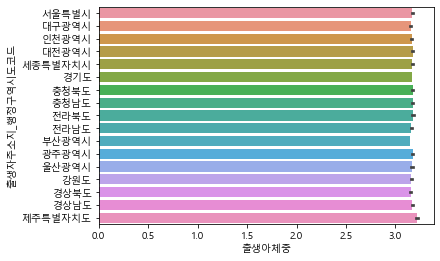

In [115]:
sns.barplot( data = data3, x = '출생아체중', y = '출생자주소지_행정구역시도코드')

### 기계학습3     
아래의 기준으로 추가적인 전처리를 실행하고 `출생아체중`이 각 컬럼들의 값에 따른 차이가 존재하는지 통계 검정을 실시하라
- 데이터 필터 : `신고월`이 2월이며 `신고일`이 10일 이하
- 컬럼제거 : 연도,신고연도,신고월,신고일, 출생자주소지_행정구역시도코드, 결혼중외의자녀여부코드,부_교육정도코드,모_직업분류코드,출생연도,출생월,출생장소코드,실제결혼연도,실제결혼월,모생존아수코드,부_국적코드,모_국적코드,모_국적구분코드,부_국적구분코드

In [116]:
data_filtered = data3[(data3['신고월'] == 2) & (data3['신고일'] <= 10)]
data_filtered = data_filtered.drop(['연도','신고연도','신고월','신고일', '출생자주소지_행정구역시도코드', '결혼중외의자녀여부코드','부_교육정도코드','모_직업분류코드','출생연도',\
                                    '출생월','출생장소코드','실제결혼연도','실제결혼월','모생존아수코드','부_국적코드','모_국적코드','모_국적구분코드','부_국적구분코드'], axis = 1).reset_index(drop = True)
data_filtered

,성별코드,부_직업분류코드,부_각세연령,모_교육정도코드,모_각세연령,임신주수,다태아분류코드,다태아출산순위코드,출생아체중,모총출생아수코드,부모동거기간
0,남자,관리자,31.000,대학원이상,31.000,40,단태아,첫째,3.180,1명,0
1,남자,관리자,33.000,대학(교),42.000,38,단태아,첫째,3.340,1명,1
2,남자,관리자,30.000,대학(교),30.000,38,단태아,첫째,3.930,1명,1
3,남자,관리자,33.000,대학(교),32.000,38,단태아,첫째,3.114,2명,4
4,남자,관리자,33.000,대학(교),33.000,38,단태아,첫째,3.790,1명,0
...,...,...,...,...,...,...,...,...,...,...,...
26260,여자,전문가 및 관련 종사자,29.857,대학(교),28.361,38,단태아,첫째,3.480,2명,2
26261,여자,서비스 종사자 및 판매 종사자,35.917,고등학교,34.273,37,단태아,첫째,3.240,1명,0
26262,여자,"학생, 가사, 무직",29.523,대학(교),29.939,39,단태아,첫째,2.800,1명,7
26263,남자,서비스 종사자 및 판매 종사자,44.501,대학(교),25.745,0,단태아,첫째,2.500,1명,0


In [117]:
data_filtered.isna().sum()

성별코드         0
부_직업분류코드     0
부_각세연령       0
모_교육정도코드     0
모_각세연령       0
임신주수         0
다태아분류코드      0
다태아출산순위코드    0
출생아체중        0
모총출생아수코드     0
부모동거기간       0
dtype: int64

### 기계학습4     
3에서 전처리한 데이터를 바탕으로 출생아 체중을 예측하는 회귀 모델을 만들려고한다. 아래의 조건에 맞게 모델링을 진행하고 평가하라
- 성별코드 기준으로 층화추출 진행 (학습데이터 70%, 평가 데이터 30%)
- 평가기준 rmse
- 랜덤포레스트, 다중선형회귀 모델로 진행

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [119]:
d = pd.get_dummies(data_filtered)

x = d.drop('출생아체중', axis = 1)
y = d[['출생아체중']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 27)

rf = RandomForestRegressor(random_state = 27)
lr = LinearRegression()

rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(f'rf mse:{np.sqrt(mean_squared_error(y_test, y_pred_rf))}')

lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print(f'rf mse:{np.sqrt(mean_squared_error(y_test, y_pred_lr))}')

rf mse:0.37136394318960014
rf mse:0.3849535201255657


### 서울 지하철 일별 승하차 인원 데이터
출처 :https://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do 후처리     
data_path = './data/subway.csv'


In [2]:
import pandas as pd
df = pd.read_csv('./data/subway.csv')
df.head()

,날짜,역번호,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,13~14,14~15,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,24~,호선
0,2016-01-01,150,서울역(150),승차,469,339,584,1144,1723,2087,2983,3527,3386,2612,3639,3554,3200,3076,2519,2281,2398,2056,996,58,1
1,2016-01-01,150,서울역(150),하차,342,1637,1753,1856,2438,2425,2548,2718,2973,2921,3341,3108,2656,2134,1859,1394,1344,1056,612,222,1
2,2016-01-01,151,시청(151),승차,103,127,110,191,298,582,700,604,731,900,1069,1339,1458,1499,1383,1284,1198,675,375,9,1
3,2016-01-01,151,시청(151),하차,68,306,554,939,689,665,884,956,1084,1216,1033,1035,951,792,618,402,309,192,114,34,1
4,2016-01-01,152,종각(152),승차,702,341,234,296,335,419,733,865,991,1300,1772,2175,2580,2627,2302,2315,2365,2140,1117,51,1


### 기계학습5    
아래의 기준으로 전처리를 진행하라     
1. 일자마다 노선별로 각 시간대의 모든역에서의 이용 승객 수를 승차,하차 각각 더한다.
    - 날짜,호선,구분,모든시간대 컬럼만 남아있어야한다. (4386 rows × 23 columns)
2. 아래의 조건으로 새로운 데이터프레임을 생성한다. 일자마다 호선별로 각 시간대의 승차 / 하차 비율을 구하여 _ratio 를 붙혀 새로운 컬럼을 만든다.
    - 2016-01-01, 1호선의 `05 ~ 06(승차) /05 ~ 06(하차)` : 
        - 컬럼 : `05~06_ratio` 
        - 값 : 3.5696 (2613/732)
3. 해당 일자가 평일(0)인지 주말(1)인지 구분하는 'weekend' 컬럼을 추가한다

<img src='./data/2.png'>

In [121]:
df.head(5)

,날짜,역번호,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,13~14,14~15,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,24~,호선
0,2016-01-01,150,서울역(150),승차,469,339,584,1144,1723,2087,2983,3527,3386,2612,3639,3554,3200,3076,2519,2281,2398,2056,996,58,1
1,2016-01-01,150,서울역(150),하차,342,1637,1753,1856,2438,2425,2548,2718,2973,2921,3341,3108,2656,2134,1859,1394,1344,1056,612,222,1
2,2016-01-01,151,시청(151),승차,103,127,110,191,298,582,700,604,731,900,1069,1339,1458,1499,1383,1284,1198,675,375,9,1
3,2016-01-01,151,시청(151),하차,68,306,554,939,689,665,884,956,1084,1216,1033,1035,951,792,618,402,309,192,114,34,1
4,2016-01-01,152,종각(152),승차,702,341,234,296,335,419,733,865,991,1300,1772,2175,2580,2627,2302,2315,2365,2140,1117,51,1


In [3]:
df_on = df[df['구분'] == '승차'].groupby(['날짜', '호선'], as_index = False).sum().drop('역번호', axis = 1)
df_off = df[df['구분'] == '하차'].groupby(['날짜', '호선'], as_index = False).sum().drop('역번호', axis = 1)

data = df_on[['날짜', '호선']]

for col in df_on.columns[2:]:
    data[col+'_ratio'] = df_on[col]/df_off[col]

data['날짜'] = pd.to_datetime(data['날짜'])
data['weekend'] = data.날짜.dt.weekday//5
data

,날짜,호선,05~06_ratio,06~07_ratio,07~08_ratio,08~09_ratio,09~10_ratio,10~11_ratio,11~12_ratio,12~13_ratio,13~14_ratio,14~15_ratio,15~16_ratio,16~17_ratio,17~18_ratio,18~19_ratio,19~20_ratio,20~21_ratio,21~22_ratio,22~23_ratio,23~24_ratio,24~_ratio,weekend
0,2016-01-01,1,3.569672,0.631725,0.548638,0.636792,0.775704,0.808009,0.831517,0.770004,0.766533,0.801024,1.045816,1.277316,1.353502,1.395663,1.458895,1.772087,1.944890,1.846209,1.311940,0.183721,0
1,2016-01-01,2,5.173876,1.198138,1.191171,1.100397,0.981767,1.037915,0.989607,0.968656,0.933618,0.944873,0.930663,0.979071,0.966366,0.934122,0.958119,1.079435,1.189924,1.170612,0.760431,0.004000,0
2,2016-01-01,3,3.814969,0.630485,0.782427,0.833200,0.759934,0.787604,0.828105,0.863113,0.862567,0.884181,1.018443,1.102005,1.154037,1.070333,1.050004,1.114768,1.227530,1.097164,0.506338,0.011957,0
3,2016-01-02,1,2.398010,0.591137,0.499784,0.582205,0.590733,0.642208,0.663121,0.686435,0.724733,0.818402,1.118137,1.348625,1.417669,1.380289,1.613574,2.016819,2.268172,2.443082,1.543539,0.177613,1
4,2016-01-02,2,3.903804,0.992869,1.161872,1.023701,0.870228,0.914519,0.916810,0.910801,0.898258,0.909322,0.949244,0.982930,0.995394,0.891454,0.949256,1.189477,1.190655,1.242373,0.776279,0.008628,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,2017-12-30,2,4.192371,0.973720,1.122991,1.006728,0.872548,0.914181,0.894149,0.899760,0.885352,0.915056,0.995610,1.036389,0.971514,0.912233,0.969502,1.207485,1.259653,1.260905,0.821118,0.059211,1
2189,2017-12-30,3,3.829358,0.698214,0.900690,0.812069,0.700604,0.844556,0.890141,0.941040,0.960266,0.983540,1.085397,1.188620,1.111460,0.992577,1.064563,1.277421,1.261905,1.125464,0.489326,0.046806,1
2190,2017-12-31,1,2.720721,0.591434,0.550410,0.643494,0.611803,0.612599,0.637833,0.643521,0.723367,0.829135,1.079348,1.278544,1.336936,1.309632,1.269790,1.274800,1.249054,0.874917,0.522352,2.377425,1
2191,2017-12-31,2,4.567096,1.028954,1.091271,1.139378,0.990778,0.916940,0.859628,0.936747,0.908301,0.929135,0.970702,0.978345,0.981762,0.926350,0.954940,1.081702,1.107345,1.008599,0.628387,1.051432,1


### 기계학습6     
데이터 EDA를 진행하라. (시각화 포함)

In [5]:
data1 = data[data['호선'] == 1].drop(['날짜', '호선', 'weekend'], axis = 1).mean()
data2 = data[data['호선'] == 2].drop(['날짜', '호선', 'weekend'], axis = 1).mean()
data3 = data[data['호선'] == 3].drop(['날짜', '호선', 'weekend'], axis = 1).mean()

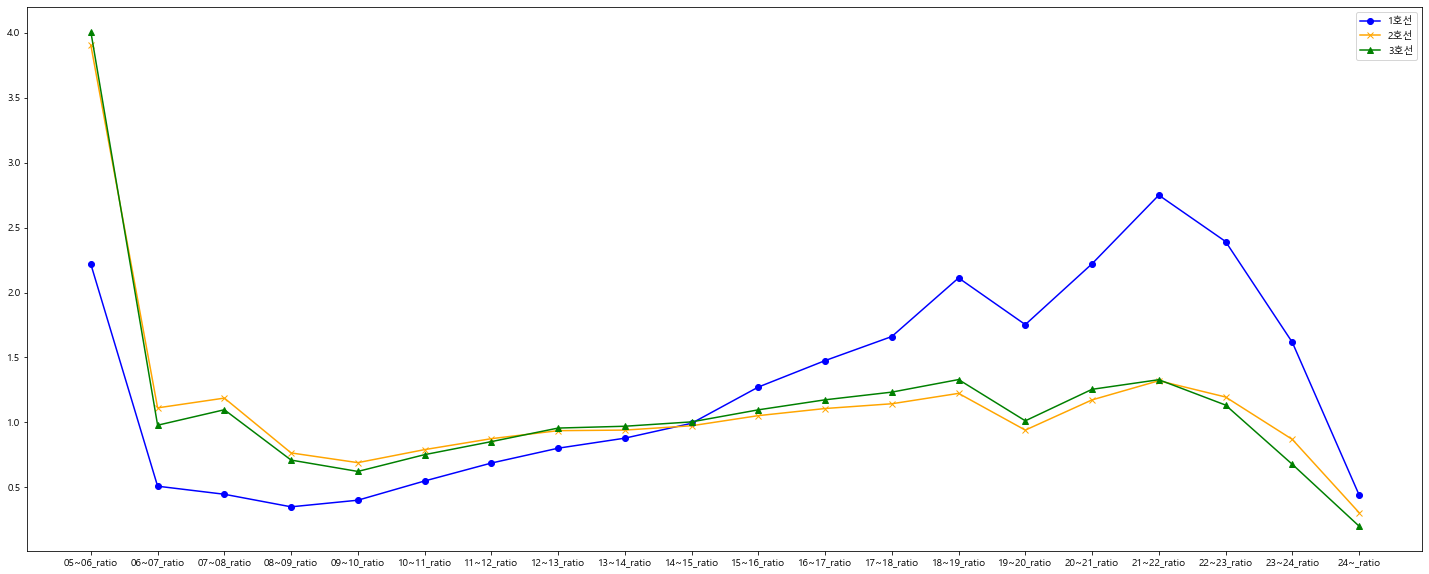

In [9]:
plt.figure(figsize = (25,10))
plt.plot(data1, 'o-', c= 'blue', label = '1호선')
plt.plot(data2, 'x-', c= 'orange', label = '2호선')
plt.plot(data3, '^-', c= 'green', label = '3호선')
plt.legend()
plt.show()

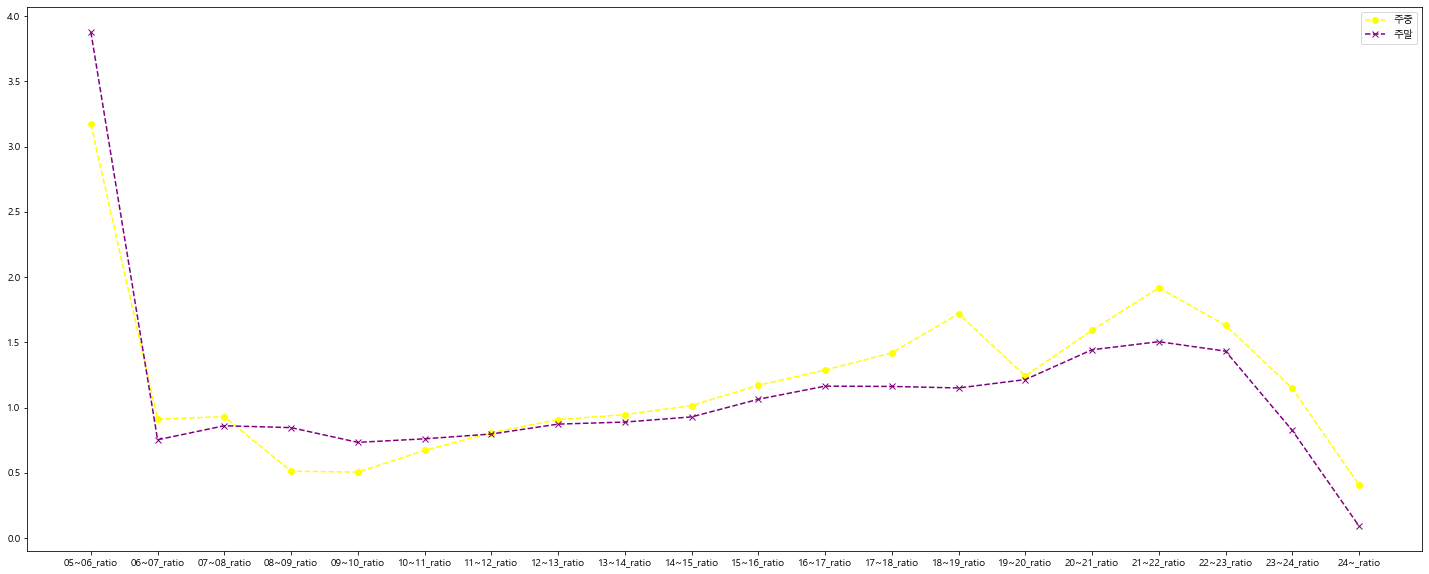

In [10]:
data4 =  data[data['weekend'] == 0].drop(['날짜', '호선', 'weekend'], axis = 1).mean()
data5 =  data[data['weekend'] == 1].drop(['날짜', '호선', 'weekend'], axis = 1).mean()

plt.figure(figsize = (25,10))
plt.plot(data4, 'o--', c= 'yellow', label = '주중')
plt.plot(data5, 'x--', c= 'purple', label = '주말')
plt.legend()
plt.show()

In [11]:
data.describe()

,호선,05~06_ratio,06~07_ratio,07~08_ratio,08~09_ratio,09~10_ratio,10~11_ratio,11~12_ratio,12~13_ratio,13~14_ratio,14~15_ratio,15~16_ratio,16~17_ratio,17~18_ratio,18~19_ratio,19~20_ratio,20~21_ratio,21~22_ratio,22~23_ratio,23~24_ratio,24~_ratio,weekend
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000
mean,2.000000,3.375685,0.866359,0.910421,0.608344,0.571242,0.697067,0.804607,0.898034,0.929918,0.990458,1.140323,1.252158,1.345884,1.555151,1.235205,1.549727,1.799640,1.573891,1.054438,0.316763,0.287278
std,0.816683,0.917660,0.284431,0.344506,0.252819,0.176745,0.122047,0.090068,0.082579,0.061943,0.061937,0.117353,0.180502,0.268585,0.514118,0.393225,0.519812,0.748588,0.616495,0.460653,0.211089,0.452595
min,1.000000,1.461538,0.394098,0.349358,0.205264,0.235286,0.445698,0.482578,0.529881,0.603456,0.637150,0.758040,0.628791,0.665731,0.683833,0.763432,0.965465,1.023136,0.874917,0.418851,0.000817,0.000000
25%,1.000000,2.660482,0.523498,0.499938,0.495064,0.498590,0.575247,0.710448,0.844696,0.902779,0.958730,1.070717,1.136588,1.190310,1.293744,0.953964,1.196425,1.309927,1.139521,0.732718,0.149709,0.000000
50%,2.000000,3.656616,0.982730,1.096304,0.626181,0.582005,0.730321,0.847944,0.932594,0.944251,1.004635,1.108926,1.185649,1.271375,1.413120,1.024267,1.256244,1.387930,1.208758,0.887785,0.299581,0.000000
75%,3.000000,4.012448,1.134655,1.200436,0.691215,0.647679,0.762183,0.870351,0.954903,0.973228,1.029022,1.205144,1.419437,1.486925,1.574027,1.560023,1.918795,2.201978,2.150678,1.323856,0.458838,1.000000
max,3.000000,5.173876,1.384714,1.493453,1.214564,1.155784,1.219432,1.085994,1.094719,1.087959,1.159808,1.513676,1.852787,1.986891,3.071525,2.258995,2.785230,3.543736,3.847935,2.641147,2.511066,1.000000


### 기계학습7     
호선을 예측하는 분류 모델을 만들고 평가하라
- 평가데이터 : 일(day)이 4로 나눈 나머지가 1인 일자
- 학습데이터 : 그 외 
- 평가지표 : f1_score (micro,macro 모두 확인)
- 2가지 이상 모델

In [16]:
from sklearn.svm import SVC
from xgboost import XGBRFClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [31]:
train = data[data['날짜'].dt.day % 4 != 1].reset_index(drop = True)
test = data[data['날짜'].dt.day % 4 == 1].reset_index(drop = True)

In [32]:
x_train = train.drop(['날짜', '호선'], axis = 1)
x_train['weekend'] = x_train['weekend'].astype('str')
x_train1 = pd.get_dummies(x_train)
y_train = train[['호선']]

scaler = StandardScaler()
x_num = x_train.drop('weekend', axis = 1)
x_num_scaled = scaler.fit_transform(x_num)
x_dummies = pd.get_dummies(x_train[['weekend']])
x_train2 = pd.concat((pd.DataFrame(x_num_scaled, columns = x_num.columns), x_dummies), axis = 1)
x_train2

,05~06_ratio,06~07_ratio,07~08_ratio,08~09_ratio,09~10_ratio,10~11_ratio,11~12_ratio,12~13_ratio,13~14_ratio,14~15_ratio,15~16_ratio,16~17_ratio,17~18_ratio,18~19_ratio,19~20_ratio,20~21_ratio,21~22_ratio,22~23_ratio,23~24_ratio,24~_ratio,weekend_0,weekend_1
0,-1.058000,-0.968495,-1.192393,-0.097334,0.116373,-0.448582,-1.583767,-2.613177,-3.367503,-2.814210,-0.188428,0.537975,0.265944,-0.345717,0.960006,0.892712,0.620884,1.400454,1.059567,-0.662068,0,1
1,0.583594,0.439680,0.725742,1.651484,1.698920,1.788160,1.249851,0.140943,-0.531326,-1.331463,-1.630357,-1.488781,-1.306497,-1.293288,-0.724903,-0.691785,-0.812276,-0.536221,-0.602592,-1.455531,0,1
2,0.760170,-0.438621,0.177439,0.987784,0.760141,0.801589,0.948286,0.172581,-0.774127,-0.731204,-1.000945,-0.605711,-0.596212,-0.973067,-0.381976,-0.560294,-0.767122,-0.769026,-1.185812,-1.413734,0,1
3,-0.175367,-0.904755,-0.950584,0.404353,1.024684,-0.643038,-1.821844,-2.236125,-3.213082,-2.646418,0.470008,1.172970,0.729375,-0.040774,1.186652,0.566265,0.449820,1.004749,0.719005,-0.817183,0,1
4,1.316136,0.571300,0.597444,2.249120,2.241534,1.571741,0.346458,0.449665,-0.090860,-1.283001,-1.506601,-1.473695,-1.232912,-1.211030,-0.625476,-0.683005,-0.834358,-0.750372,-0.726712,-1.463627,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,0.898187,0.372560,0.613099,1.584249,1.712056,1.785381,0.996734,0.005413,-0.742277,-1.237957,-1.234513,-1.192503,-1.395419,-1.253009,-0.673554,-0.657297,-0.720505,-0.506331,-0.505454,-1.218024,0,1
1616,0.502434,-0.593162,-0.030930,0.813181,0.738480,1.213486,0.951969,0.512123,0.482162,-0.121099,-0.467950,-0.348808,-0.874298,-1.097269,-0.432449,-0.523357,-0.717509,-0.724789,-1.224234,-1.276269,0,1
1617,-0.706185,-0.967453,-1.045724,0.145437,0.235674,-0.691784,-1.866218,-3.139947,-3.389827,-2.639162,-0.519594,0.149571,-0.034683,-0.482679,0.088067,-0.528376,-0.734601,-1.128908,-1.152689,9.667063,0,1
1618,1.306705,0.566168,0.521201,2.109691,2.381498,1.808044,0.611150,0.459433,-0.367190,-1.008347,-1.447164,-1.514194,-1.357257,-1.225645,-0.710486,-0.898191,-0.923083,-0.913286,-0.922978,3.440913,0,1


In [33]:
x_test = test.drop(['날짜', '호선'], axis = 1)
x_test['weekend'] = x_test['weekend'].astype('str')
x_test1 = pd.get_dummies(x_test)
y_test = test[['호선']]

x_num = x_test.drop('weekend', axis = 1)
x_num_scaled = scaler.transform(x_num)
x_dummies = pd.get_dummies(x_test[['weekend']])
x_test2 = pd.concat((pd.DataFrame(x_num_scaled, columns = x_num.columns), x_dummies), axis = 1)
x_test2

,05~06_ratio,06~07_ratio,07~08_ratio,08~09_ratio,09~10_ratio,10~11_ratio,11~12_ratio,12~13_ratio,13~14_ratio,14~15_ratio,15~16_ratio,16~17_ratio,17~18_ratio,18~19_ratio,19~20_ratio,20~21_ratio,21~22_ratio,22~23_ratio,23~24_ratio,24~_ratio,weekend_0,weekend_1
0,0.219329,-0.826223,-1.050858,0.118888,1.163710,0.913293,0.297156,-1.587361,-2.684306,-3.097599,-0.805876,0.142764,0.027003,-0.315915,0.567694,0.424010,0.190900,0.437732,0.557840,-0.633390,1,0
1,1.968209,1.159204,0.810623,1.955283,2.330472,2.801720,2.062966,0.851113,0.046616,-0.751689,-1.788997,-1.510171,-1.414588,-1.210580,-0.702424,-0.902533,-0.813248,-0.651968,-0.636925,-1.477263,1,0
2,0.486748,-0.830569,-0.373548,0.896884,1.074419,0.745689,0.259047,-0.444441,-1.114679,-1.741473,-1.039576,-0.828846,-0.715753,-0.946545,-0.469376,-0.834865,-0.763230,-0.770435,-1.187381,-1.439903,1,0
3,-1.616196,-1.340238,-1.572632,-1.505752,-1.457720,-1.780130,-1.088247,-0.958866,-0.858987,0.551881,1.694223,1.602237,1.792677,1.743906,2.141941,2.154448,1.942615,2.054337,1.776248,0.965812,1,0
4,0.253460,0.885266,0.932772,0.085302,0.000782,0.559835,0.749605,0.423137,0.348822,-0.136226,-0.436793,-0.722348,-0.373415,-0.302508,-0.696577,-0.690783,-0.521918,-0.598734,-0.309743,0.478597,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,1.326484,0.347856,0.544850,1.705682,2.020076,1.534748,0.540626,0.080146,-1.391693,-2.097171,-1.845791,-1.386139,-1.299639,-1.065257,-0.359150,-0.542991,-0.681512,-0.625856,-0.624352,-1.378808,1,0
569,0.545567,-0.741483,-0.118123,1.039316,1.084340,0.904363,0.763749,1.522970,0.669534,-0.789041,-1.010946,-0.873734,-1.070702,-1.032510,-0.466456,-0.544911,-0.839425,-0.907337,-1.192160,-1.217431,1,0
570,-1.475222,-1.158187,-1.388591,-1.450484,-1.522848,-1.342362,-1.851528,-1.764219,-1.240933,1.675083,1.216659,1.560993,1.140319,0.360248,0.500648,0.696935,0.784073,1.618849,2.018679,1.606504,1,0
571,0.265730,0.906219,1.023425,0.062958,0.323953,0.870567,0.526986,0.372774,0.606166,0.572106,-0.276217,-0.522942,-0.739966,-0.870495,-0.897346,-0.776652,-0.698876,-0.460171,0.046337,0.754603,1,0


In [40]:
svc = SVC(random_state = 47, probability = True)
xgbc =XGBRFClassifier(random_state = 47)

svc.fit(x_train2, y_train)
xgbc.fit(x_train1, y_train-1)

y_pred_svc = svc.predict(x_test2)
y_pred_xgbc = xgbc.predict(x_test1)

#print(f'svc macro:{f1_score(y_test, y_pred_scv, average = 'macro')}')
#print(f'svc micro:{f1_score(y_test, y_pred_scv, average = 'micro')}')


In [43]:
print(f1_score(y_test, y_pred_svc, average = 'macro'))
print(f1_score(y_test, y_pred_svc, average = 'micro'))

0.9982547873421828
0.9982547993019197


# 통계 (40점)

### 통계1      
한 카페에서는 고객들이 음료를 주문한 후, 음료가 준비되는 시간을 추적한다.      
음료 준비 시간은 평균이 5분이고, 표준편차가 1.5분인 정규분포를 따른다.         

1) 특정 고객이 음료를 6분 이내에 받을 확률은?     
2) 3분에서 7분 사이에 음료가 준비될 확률은?   
3) 10명의 고객 중, 6분 이내에 음료를 받을 고객이 3명 이상일 확률은?

In [46]:
from scipy.stats import norm
from scipy.stats import binom

In [45]:
normal = norm(5,1.5)
normal.mean(), normal.std()

(5.0, 1.5)

In [47]:
print(f'(1){normal.cdf(6)}')
print(f'(2){normal.cdf(7) - normal.cdf(3)}')
p = normal.cdf(6)
bi = binom(10, p)
print(f'(3){1-bi.cdf(2)}')

(1)0.7475074624530771
(2)0.8175775605482642
(3)0.999552401593017


### 통계2
한 레스토랑에서 두 명의 셰프(A와 B)가 준비한 요리에 대한 고객들의 만족도를 조사했다.     
각 셰프가 준비한 요리에 대해 10명의 고객이 점수를 매겼다. 점수는 1점부터 10점까지이며, 점수가 높을수록 만족도가 높음을 의미한다.     
두 셰프의 요리에 대한 고객 점수가 정규분포를 따르지 않는다고 가정하고, 셰프 A와 셰프 B의 요리에 대해 고객들의 만족도가 차이가 나는지 비모수 검정을 통해 확인하라.     

셰프 A의 고객 점수: 
7,8,9,5,6,7,8,6,7,9

셰프 B의 고객 점수: 
6,5,8,7,6,5,6,4,7,5

(1) 가설설정     
(2) 통계검정

### 통계3       
병원에서 특정 질병의 진단을 위해 두 가지 서로 다른 검사 (검사 X, 검사 Y)를 시행한다. 검사 X와 Y는 서로 독립적이며 각각 다른 진단 결과를 제공한다.    


- 전체 인구에서 질병을 가진 사람의 비율: 2% 
- 질병이 없는 사람의 비율: 98% 
- 질병이 있는 경우 검사 X가 양성일 확률: 73% 
- 질병이 없는 경우 검사 X가 양성일 확률: 10% 
- 질병이 있는 경우 검사 Y가 양성일 확률: 66% 
- 질병이 없는 경우 검사 Y가 양성일 확률: 5% 


1. 검사 X와 검사 Y 모두 양성일 때, 환자가 실제로 질병을 가질 확률은 얼마인가?
2. 검사 X가 양성이고 검사 Y가 음성일 때, 환자가 실제로 질병을 가질 확률은 얼마인가?
3. 검사 Y가 양성일 때, 검사 X가 음성일 확률은?